


 [click](https://drive.google.com/drive/folders/10Uqr_lQUgamXQs5Z43PKwwuCRx6hG52b?usp=sharing) here for the furniture dataset .

in drive
*   create shortcut to the My Drive folder
*   Run the below code to access from drive and upload to session storage




In [0]:
from google.colab import drive
from pathlib import Path
drive.mount("/gdrive", force_remount=True)


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
%load_ext autoreload
%autoreload 2

import sys
#appending path of the dataset
from pathlib import Path
base = Path('/gdrive/My Drive/furniture-images/img/')
sys.path.append(str(base))

In [0]:
zip_path = base/'furniture_images.zip'
!cp "{zip_path}" .
!unzip -q furniture_images.zip
!rm furniture_images.zip

### Import Libraries



In [0]:
#importing libraries
import tensorflow as tf

import tensorflow.keras.backend as K
from tensorflow.keras.preprocessing import image
from tensorflow.keras import regularizers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l2
from tensorflow.keras import layers
from tensorflow.keras import Model

from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras.applications.inception_v3 import preprocess_input

import os
import random

import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

### Accessing the dataset directories and images

In [0]:
base_dir = 'furniture-images/img'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
category = os.listdir(train_dir)

In [0]:

# Creating parameters for graph (visualization); output configuration for images will be 4x4 
nrows = 1
ncols = 8

# Index for iterating over images
pic_index = 0

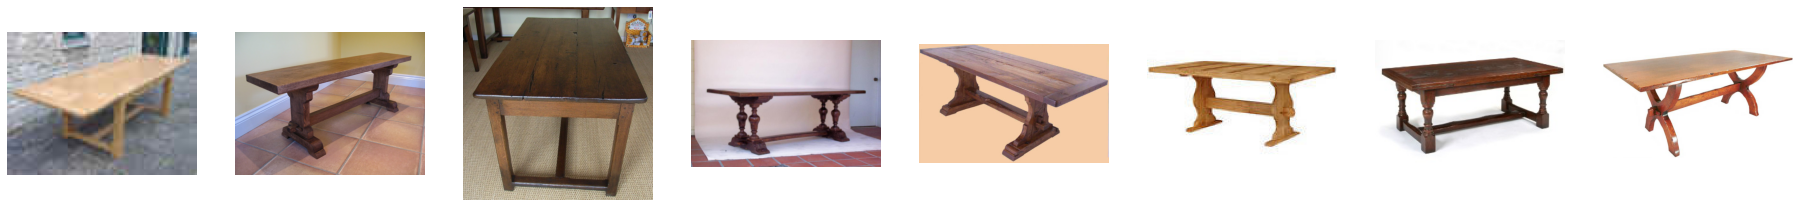

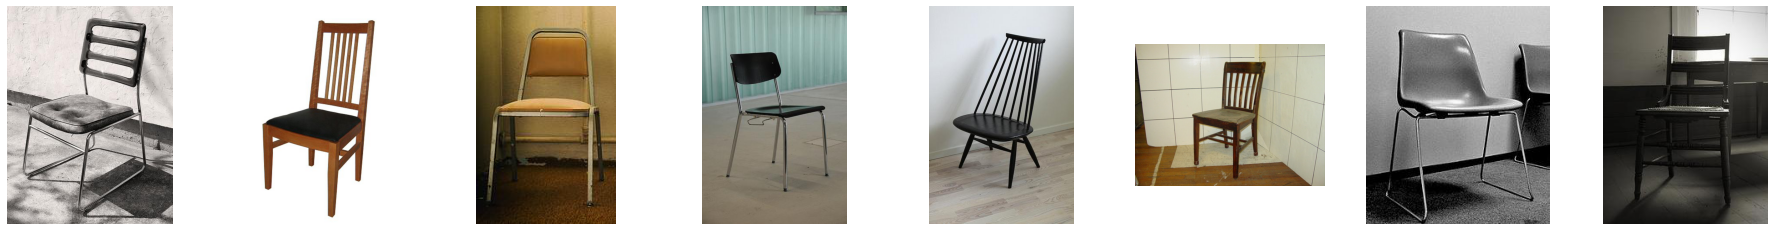

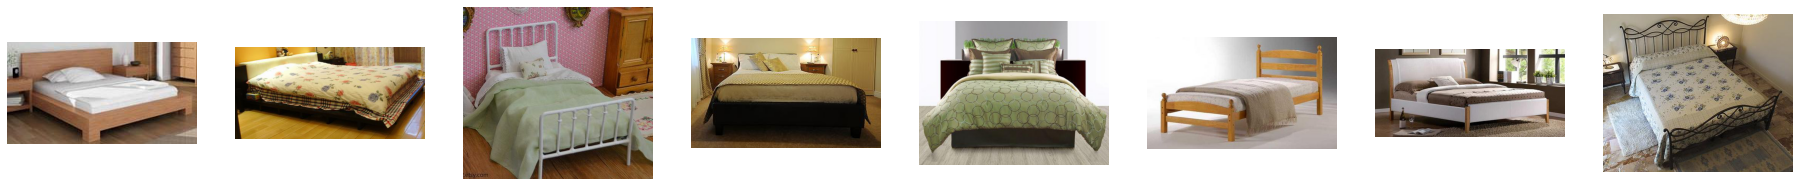

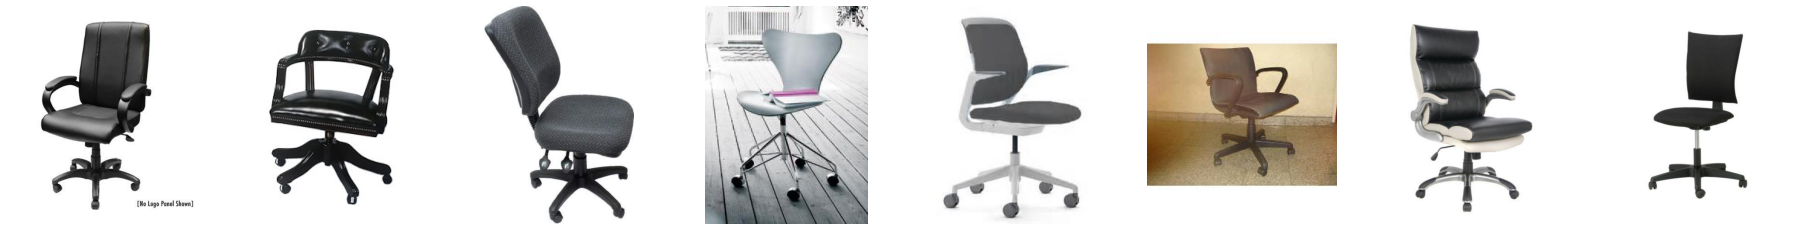

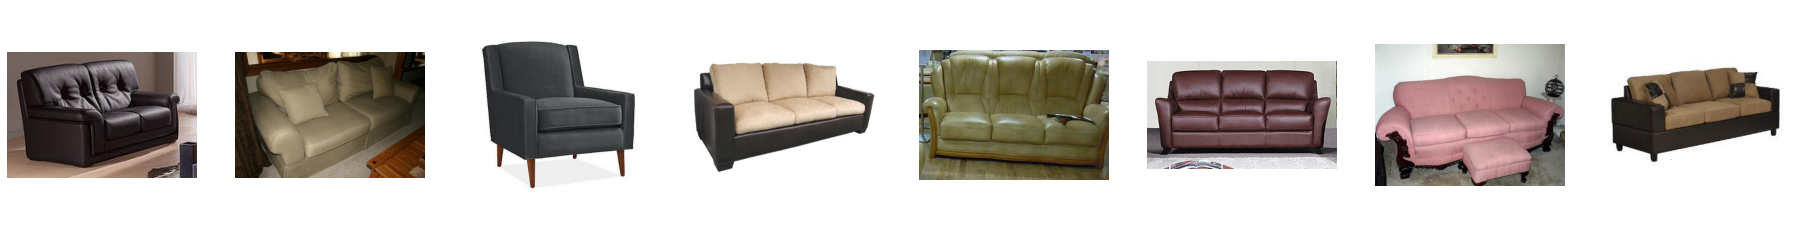

In [0]:


pic_index += 8

for it in category:
  # Setting up matplotlib figure , and sizing it to fit 4x4 configuration
  fig = plt.gcf()
  fig.set_size_inches(ncols * 4, nrows * 4)
  train_cat_dir = os.path.join(train_dir, it)
  train_cat_fnames = os.listdir(train_cat_dir)
  next_pix = [os.path.join(train_cat_dir, fname) 
                  for fname in train_cat_fnames[pic_index-8:pic_index]]

  for i, img_path in enumerate(next_pix):
    # Setting up subplot; subplot indices to start at 1
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') # To not display axes (or gridlines)

    img = mpimg.imread(img_path)
    plt.imshow(img)

  plt.show()

In [0]:
train_files = sum([len(files) for i, j, files in os.walk(train_dir)])
val_files = sum([len(files) for i, j, files in os.walk(val_dir)])
print(train_files, val_files)

4024 423


In [0]:

#Setting up the hyperparameters
n_classes = 5
epochs = 5
nb_train_samples = train_files
nb_validation_samples = val_files
num_epochs = epochs



img_width, img_height = 150, 150
train_data_dir = train_dir 
validation_data_dir = val_dir 
batch_size = 16



### Building up a model through tensorflow.keras.layers library
The model will use three convolution hidden layers with filter size three and activation function relu. The output layer has five output neurons with action function softmax

In [0]:


# Input feature map is 150x150x3: 150x150 for the image pixels, and 3 for
# the three colors : Red, Green, and Blue
img_input = layers.Input(shape=(150, 150, 3))

# First convolution extracts sixteen filters that are 3x3
# Convolution is then followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(16, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)

# Second convolution extracts thirty-two filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

# Third convolution extracts sixty-four filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

In [0]:
# Flattening feature map to a 1-dimension tensor to add the fully connected layers
x = layers.Flatten()(x)

# Creating a fully connected layer with ReLU activation and 512 hidden units
x = layers.Dense(512, activation='relu')(x)

# Creating an output layer with 5 nodes and softmax activation
output = layers.Dense(5, activation='softmax')(x)

# Creating the model:
# input = input feature map
# output = input feature map + stacked convolution/maxpooling layers + fully 
# connected layer + sigmoid output layer
model = Model(img_input, output)

### Printing the model summary Plot and architecture
Model architecture (model_plot.png image) gets saved in the root folder of the session by running the below code.

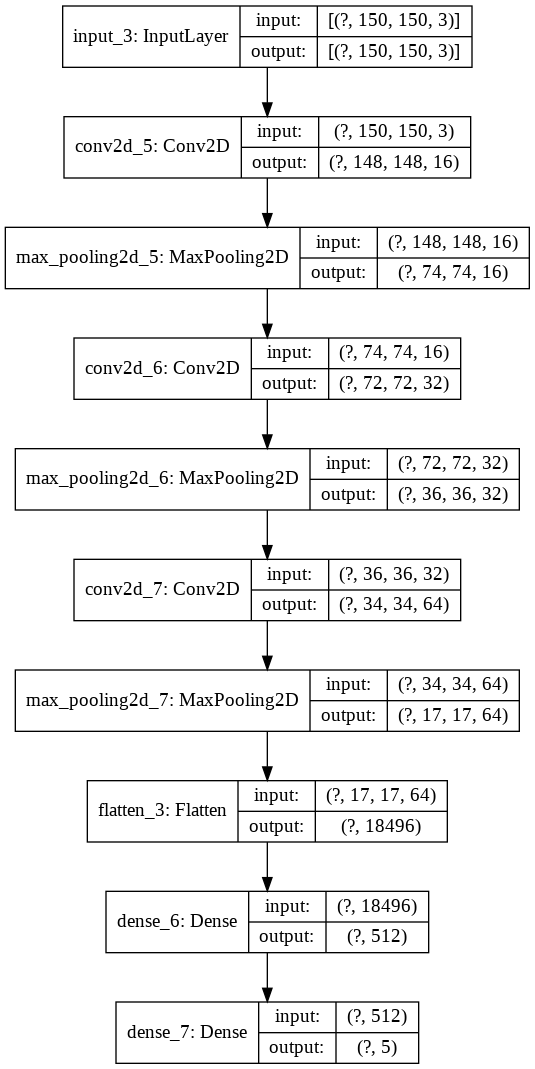

In [0]:

from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


In [0]:
print(model.summary())

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 64)        0   

### Running the model

In [0]:
from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [0]:

train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)


train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')


Found 4024 images belonging to 5 classes.
Found 423 images belonging to 5 classes.


In [0]:
history = model.fit_generator(train_generator,
                    steps_per_epoch = nb_train_samples // batch_size,
                    validation_data=validation_generator,
                    validation_steps=nb_validation_samples // batch_size,
                    epochs=num_epochs,
                    verbose=1)

Epoch 1/5
251/251 [==============================] - 116s 461ms/step - loss: 0.8276 - accuracy: 0.6947 - val_loss: 0.6543 - val_accuracy: 0.7596
Epoch 2/5
251/251 [==============================] - 120s 476ms/step - loss: 0.5419 - accuracy: 0.8086 - val_loss: 0.5148 - val_accuracy: 0.8077
Epoch 3/5
251/251 [==============================] - 115s 460ms/step - loss: 0.4137 - accuracy: 0.8588 - val_loss: 0.3273 - val_accuracy: 0.8678
Epoch 4/5
251/251 [==============================] - 116s 461ms/step - loss: 0.3340 - accuracy: 0.8827 - val_loss: 0.3537 - val_accuracy: 0.8822
Epoch 5/5
251/251 [==============================] - 116s 461ms/step - loss: 0.2801 - accuracy: 0.9072 - val_loss: 0.3568 - val_accuracy: 0.8750


### Plot the Results
Show the accuracy and loss variations per epoch in the graph

In [0]:

history.history

{'accuracy': [0.6947211027145386,
  0.8086327314376831,
  0.8587824106216431,
  0.8827345371246338,
  0.9071856141090393],
 'loss': [0.827628493309021,
  0.5418614745140076,
  0.41366609930992126,
  0.3339846730232239,
  0.28005316853523254],
 'val_accuracy': [0.7596153616905212,
  0.807692289352417,
  0.8677884340286255,
  0.8822115659713745,
  0.875],
 'val_loss': [0.6542705297470093,
  0.514761745929718,
  0.3272649645805359,
  0.3537292182445526,
  0.35679784417152405]}

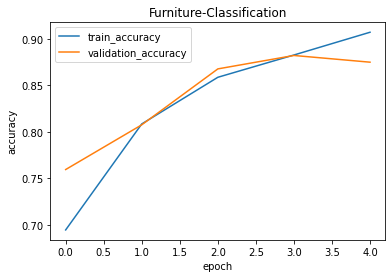

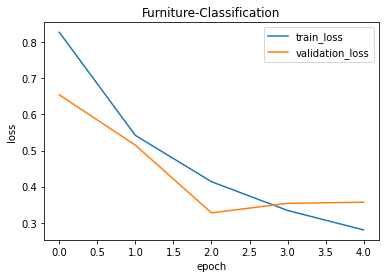

In [0]:
# Plotting the graphs
def plot_accuracy(history,title):
    plt.title(title)
    plt.plot(history.history['accuracy']) # change acc to accuracy if testing TF 2.0
    plt.plot(history.history['val_accuracy']) # change val_accuracy if testing TF 2.0
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train_accuracy', 'validation_accuracy'], loc='best')
    plt.show()


def plot_loss(history,title):
    plt.title(title)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train_loss', 'validation_loss'], loc='best')
    plt.show()


plot_accuracy(history,'Furniture-Classification')
plot_loss(history,'Furniture-Classification')